In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
df_train = pd .read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
df_train.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
pd.set_option('display.max_rows', 1000)    # Show up to 100 rows
pd.set_option('display.max_columns', 1000) # Show up to 100 columns
pd.set_option('display.width', None)      # Prevent line wrapping
pd.set_option('display.max_colwidth', None) # Show full text in each cell

# Now try again
print(df_train.isnull().mean()*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [8]:
df_test.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1, inplace=True)
df_train.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1, inplace=True)

In [9]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [10]:
import matplotlib.pyplot as plt
df_numeric= df_train.select_dtypes(include='number')

In [11]:
df_numeric.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
S

In [12]:
corr = df_numeric.corr()

In [13]:
corr.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

<Axes: >

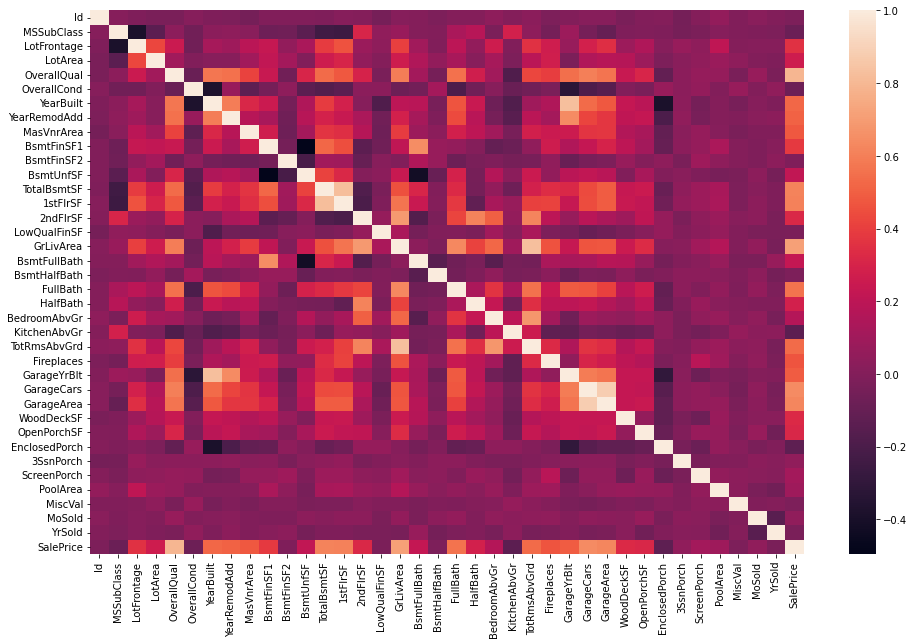

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(corr)

<Axes: >

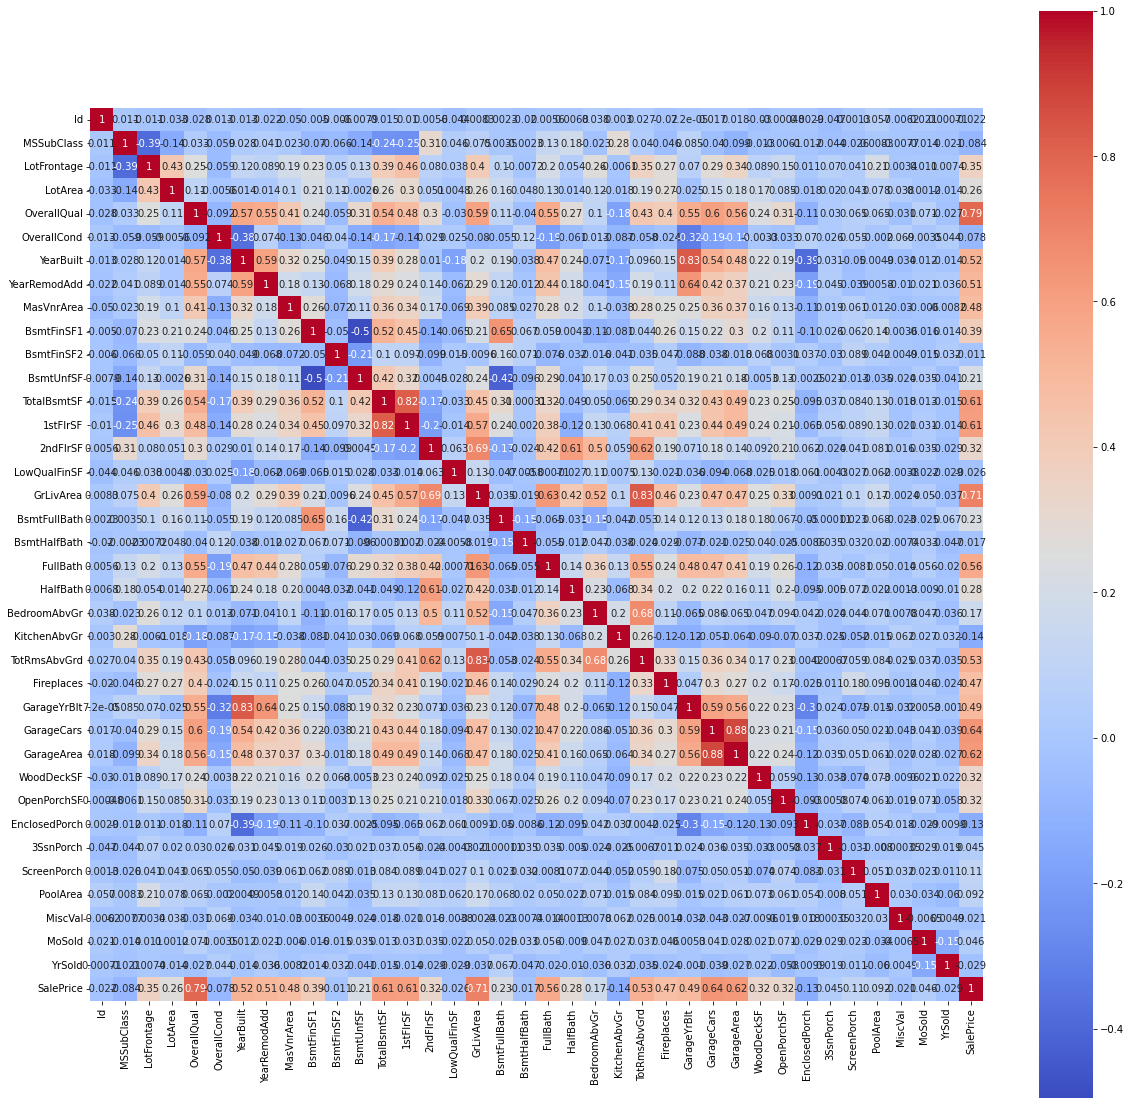

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='coolwarm',square=True)

In [17]:
upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))

In [18]:
upper.shape

(38, 38)

In [19]:
to_drop =[column for column in upper.columns if any(upper[column]>0.8)]
to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

In [20]:
df_train.drop(to_drop, axis=1,inplace=True)
df_test.drop(to_drop, axis=1,inplace=True)

In [21]:
df_train.shape

(1460, 71)

In [22]:
df_train.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
H

In [23]:
df_train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
2ndFlrSF         False
LowQualFinSF     False
GrLivArea  

In [24]:
missing_cols = df_train.columns[df_train.isnull().any()]


In [25]:
df_train.tail(14)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1446,1447,20,RL,NaN,26142,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1962,1962,Gable,CompShg,HdBoard,HdBoard,189.0,TA,TA,CBlock,TA,TA,No,Rec,593,Unf,0,595,1188,GasA,TA,Y,SBrkr,0,0,1188,0,0,1,0,3,1,TA,Typ,0,Attchd,Unf,1,TA,TA,P,261,39,0,0,0,0,0,4,2010,WD,Normal,157900
1447,1448,60,RL,80.0,10000,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,1995,1996,Gable,CompShg,VinylSd,VinylSd,438.0,Gd,TA,PConc,Gd,TA,No,GLQ,1079,Unf,0,141,1220,GasA,Ex,Y,SBrkr,870,0,2090,1,0,2,1,3,1,Gd,Typ,1,Attchd,RFn,2,TA,TA,Y,0,65,0,0,0,0,0,12,2007,WD,Normal,240000
1448,1449,50,RL,70.0,11767,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,4,7,1910,2000,Gable,CompShg,MetalSd,HdBoard,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,560,560,GasA,Gd,N,SBrkr,550,0,1346,0,0,1,1,2,1,TA,Min2,0,Detchd,Unf,1,Fa,TA,Y,168,24,0,0,0,0,0,5,2007,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,0,0,630,1,0,1,0,1,1,Ex,Typ,0,NaN,NaN,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,0,1792,0,0,2,2,4,2,TA,Typ,0,NaN,NaN,0,NaN,NaN,Y,32,45,0,0,0,0,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,CemntBd,CmentBd,194.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,Y,SBrkr,0,0,1578,0,0,2,0,3,1,Ex,Typ,1,Attchd,Fin,3,TA,TA,Y,0,36,0,0,0,0,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,0,0,1072,1,0,1,0,2,1,TA,Typ,0,Basment,Fin,2,TA,TA,Y,0,28,0,0,0,0,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,0,0,1140,0,0,1,0,3,1,TA,Typ,0,NaN,NaN,0,NaN,NaN,Y,36,56,0,0,0,0,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,0,0,1221,1,0,2,0,2,1,Gd,Typ,0,Attchd,RFn,2,TA,TA,Y,0,113,0,0,0,0,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,694,0,1647,0,0,2,1,3,1,TA,Typ,1,Attchd,RFn,2,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000


In [26]:
df_train.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lv

In [27]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [28]:
pipe1= Pipeline(
    steps=[('impute',SimpleImputer(strategy= 'most_frequent'))]
)

In [29]:
pipe2= Pipeline(
    steps=[
    ('OneHotEncoding',OneHotEncoder(handle_unknown='ignore')),
    ('impute',SimpleImputer(strategy= 'most_frequent'))
    ]
)

In [30]:
from sklearn.model_selection import train_test_split
X= df_train.drop('SalePrice',axis=1)
y= df_train['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [31]:
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()
num_columns = X_train.select_dtypes(include=['number']).columns.tolist()

In [32]:
cat_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [33]:
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(transformers=[
("Imputing",pipe1,num_columns),
("Encoding",pipe2,cat_columns)
],remainder='passthrough')


In [34]:
from xgboost import XGBRegressor


In [35]:
pipe=make_pipeline(preprocessor,XGBRegressor())

In [37]:
df_train.shape

(1460, 71)

In [38]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Imputing',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '2ndFlrSF',
                                                   'L...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [39]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,Attchd,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Detchd,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [40]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
  

In [41]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
69,70,50,RL,81.0,15593,Pave,Reg,Lvl,AllPub,Corner,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,7,4,1953,1953,Gable,CompShg,BrkFace,AsbShng,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,603,Unf,0,701,1304,GasW,TA,Y,SBrkr,983,0,2287,0,0,2,0,3,1,TA,Typ,1,Attchd,Fin,2,TA,TA,Y,0,21,114,0,0,0,0,7,2006,WD,Normal
1071,1072,60,RL,78.0,11700,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,6,6,1968,1968,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,No,Rec,298,Unf,0,429,727,GasA,Ex,Y,SBrkr,727,0,1556,0,0,1,1,4,1,TA,Typ,0,Attchd,Unf,2,TA,TA,Y,0,0,0,0,0,0,0,5,2009,WD,Normal
870,871,20,RL,60.0,6600,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,1Story,5,5,1962,1962,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,Gd,N,SBrkr,0,0,894,0,0,1,0,2,1,TA,Typ,0,Detchd,Unf,1,TA,TA,Y,0,0,0,0,0,0,0,8,2009,WD,Normal
182,183,20,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,0,0,1340,0,0,1,0,3,1,TA,Typ,1,Attchd,RFn,1,TA,TA,Y,116,0,0,180,0,0,0,6,2007,WD,Normal
1425,1426,20,RL,80.0,10721,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1959,1959,Hip,CompShg,HdBoard,HdBoard,243.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1252,1252,GasA,Ex,Y,SBrkr,0,0,1252,0,0,1,0,3,1,Gd,Typ,0,Detchd,Unf,2,TA,TA,Y,0,39,0,0,0,0,0,10,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,1002,30,RL,60.0,5400,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,691,691,GasA,Ex,Y,FuseA,0,0,691,0,0,1,0,2,1,Ex,Typ,0,Detchd,Unf,1,Fa,TA,N,0,20,94,0,0,0,0,1,2007,WD,Abnorml
1323,1324,30,RL,50.0,5330,Pave,Reg,HLS,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,4,7,1940,1950,Hip,CompShg,VinylSd,VinylSd,0.0,Fa,TA,CBlock,TA,TA,No,LwQ,280,Unf,0,140,420,GasA,Gd,Y,SBrkr,0,0,708,0,0,1,0,2,1,Fa,Typ,0,NaN,NaN,0,NaN,NaN,Y,164,0,0,0,0,0,0,12,2009,WD,Normal
973,974,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,0,0,1428,0,0,2,0,3,1,Gd,Typ,0,Attchd,Fin,2,TA,TA,Y,0,120,0,0,0,0,0,12,2008,New,Partial
507,508,20,FV,75.0,7862,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,6,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,27,Unf,0,1191,1218,GasA,Ex,Y,SBrkr,0,0,1218,0,0,2,0,2,1,Gd,Typ,0,Attchd,Fin,2,TA,TA,Y,0,102,0,0,0,0,0,9,2009,New,Partial


In [42]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Imputing',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '2ndFlrSF',
                                                   'L...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [43]:
y_predict= pipe.predict(X_test)

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define the parameter distribution
param_dist = {
    'xgbregressor__n_estimators': [100, 200, 300, 400],
    'xgbregressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgbregressor__max_depth': [3, 5, 7, 9],
    'xgbregressor__subsample': [0.7, 0.8, 0.9, 1.0],
    'xgbregressor__colsample_bytree': [0.7, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=50, 
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1  # Use all cores for faster computation
)


random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Imputing',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['Id',
                                                                                'MSSubClass',
                                                                                'LotFrontage',
                                                                                'LotArea',
                                                                                'OverallQual',
                                                                                'OverallCond',
                                                                                'YearBuilt',
                                                                                'YearRemodAdd',
                                                                                'MasVnrArea',
                                                                                'BsmtFinSF1',
                                                                                'BsmtFinSF2',
                                                                                'Bsmt...
                                                           n_jobs=None,
                                                           num_parallel_tree=None, ...))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'xgbregressor__colsample_bytree': [0.7,
                                                                           0.8,
                                                                           1.0],
                                        'xgbregressor__learning_rate': [0.01,
                                                                        0.05,
                                                                        0.1,
                                                                        0.2],
                                        'xgbregressor__max_depth': [3, 5, 7, 9],
                                        'xgbregressor__n_estimators': [100, 200,
                                                                       300,
                                                                       400],
                                        'xgbregressor__subsample': [0.7, 0.8,
                                                                    0.9, 1.0]},
                   scoring='neg_mean_squared_error', verbose=1)

In [47]:
# Best hyperparameters
print("Best parameters found: ", random_search.best_params_)

# Best model
best_model = random_search.best_estimator_


Best parameters found:  {'xgbregressor__subsample': 0.7, 'xgbregressor__n_estimators': 100, 'xgbregressor__max_depth': 5, 'xgbregressor__learning_rate': 0.1, 'xgbregressor__colsample_bytree': 0.8}


In [48]:
y_predict = best_model.predict(X_test)

In [49]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2 = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))

In [50]:
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.8430
MAE: 16143.19
RMSE: 30440.99


In [52]:
y_submission = best_model.predict(df_test)

In [53]:
submission = pd.DataFrame({
    'Id': df_test['Id'], 
    'SalePrice': y_submission
})
submission.to_csv('submission.csv', index=False)
